# Analysis of Place for Opening Coto Makassar Restaurant in Makassar, Indonesia

# Introduction

This project will look for the optimal location to open an Makassar indigenous food restaurant, i.e. Coto Makassar.
This analysis will be helpful for business people or stakeholders who are interested in opening a Coto Makassar restaurant in Makassar, Indonesia.

Based on information on the website of the South Sulawes Provincial Government, Makassar is the capital of South Sulawesi province and one of the metropolitan cities in Indonesia. Makassar is the fourth largest city in Indonesia and the largest in Eastern Indonesia.[1](https://sulselprov.go.id/pages/info_lain/22#:~:text=Kota%20Makassar%20(Macassar%2C%20Mangkasar%2C,terbesar%20di%20Kawasan%20Timur%20Indonesia.)

Makassar is also famous for having many indigenous foods. One of the most popular is Coto Makassar. Through this project, we will visualize which areas in Makassar where are the existing Coto Makassar restaurant. Then, we will determine which areas are rarely found Coto Makassar restaurants. This area would be suitable for opening a Coto Makassar restaurant with little competition. We will also map areas that have the same characteristics using a cluster model based on demographic data from each region. Through this analysis, we hope that it can help business people or stakeholders in making decisions to open a Coto Makassar restaurant.

# Data

Based on the business problems, the data we need are:
1. The latitude and longitude of city, borough, and particular venues.
2. List of Competitor Venues. especially Coto Makassar restaurants, Soup Place, and Indonesian Restaurants.
3. List of Complementary Venues. tourism and related places.

We can find the coordinates of each sub-district from the Geographic Information System Portal, Directorate General of Population and Civil Registration. This portal is a government owned page, under the Ministry of Home Affairs of the Republic of Indonesia. Furthermore, we can find the central coordinates of Makassar from the Opencage API.

We can find a list of Competitor Venues and Complementary Venues through the Foursquare API. We'll be looking for a category that matches the venues category provided by the foursquare API. A list of venue categories provided by the Foursqare API can be seen here: https://developer.foursquare.com/docs/build-with-foursquare/categories/

Coto Makassar is a indigenous food from Makassar. If we want to open a Coto Makassar restaurant, then Indonesian restaurants and other Coto Makassar restaurants will be our competitors. Coto Makassar is a type of soup food, so places that sell other soup foods will also be competitors. Based on that, we can search for categories that match the above criteria in the foursquare API. These categories are as follows:
- Indonesian Restaurant (4deefc054765f83613cdba6f)
- Soup Place (4bf58dd8d48988d1dd931735)  
There is no category for Coto Restaurant, but most restaurants that sell Coto Makassar will embed the word 'coto' in the name of the restaurant. So we will use the query 'coto' to find the Coto Makassar restaurant.

Places to sell indigenous food are also a destination for tourists to find out the uniqueness of the places they visit. So, many tourists make Coto Makassar a culinary tour. So, the area around tourist destinations can be a profitable place for the Coto Makassar restaurant. Here are the categories in the foursquare API that fit these criteria:
- Event (4d4b7105d754a06373d81259
- Travel & Transport (4d4b7105d754a06379d81259)
- Outdoors & Recreation (4d4b7105d754a06377d81259)

# Methodology

In [1]:
# The code was removed by Watson Studio for sharing.

In [2]:
# import libraries
import numpy as np
import math
import pandas as pd
import json
from datetime import date
import requests
import math
import folium
from opencage.geocoder import OpenCageGeocode
from geopy.geocoders import Nominatim
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors

**Load geospatial data of Makassar**

The cell below contains the process of loading the acquired geospatial data and then uploaded to IBM Watson Studio via IBM API.

In [3]:
# The code was removed by Watson Studio for sharing.

The data contains geospatial data for all districts in Indonesia, so we have to select only for the city of Makassar.

In [4]:
geos_indonesia = pd.read_csv(body)
geos_indonesia.head()

,province_code,kabupaten_code,kecamatan_code,lat,lng,province_name,kabupaten_name,kecamatan_name
0,11,2,42,2.534933,97.937495,NANGGROE ACEH DARUSSALAM,ACEH SINGKIL,SINGKOHOR
1,11,4,10,3.437859,97.817760,NANGGROE ACEH DARUSSALAM,ACEH TENGGARA,LAWE ALAS
2,11,4,20,3.356981,97.926602,NANGGROE ACEH DARUSSALAM,ACEH TENGGARA,LAWE SIGALA-GALA
3,11,4,21,3.316513,97.991986,NANGGROE ACEH DARUSSALAM,ACEH TENGGARA,BABUL MAKMUR
4,11,4,30,3.457155,97.904820,NANGGROE ACEH DARUSSALAM,ACEH TENGGARA,BAMBEL


In [5]:
geos_makassar = geos_indonesia.loc[geos_indonesia.kabupaten_name == 'MAKASSAR', ['kecamatan_name', 'lat', 'lng']].reset_index(drop=True)
geos_makassar.columns = ['Borough', 'Latitude', 'Longitude']
geos_makassar

,Borough,Latitude,Longitude
0,MARISO,-5.159093,119.409226
1,MAMAJANG,-5.164346,119.419383
2,TAMALATE,-5.183735,119.423737
3,RAPPOCINI,-5.173330,119.446951
4,MAKASSAR,-5.147665,119.432731
5,UJUNG PANDANG,-5.147665,119.432731
6,WAJO,-5.125586,119.410677
7,BONTOALA,-5.130839,119.420834
8,UJUNG TANAH,-5.047907,119.327939
9,TALLO,-5.118588,119.435344


**Coordinate for Makassar**

In [6]:
# The code was removed by Watson Studio for sharing.

In [7]:
geocoder = OpenCageGeocode(key)
query = 'Makassar, Indonesia'  
results = geocoder.geocode(query)

lat = results[0]['geometry']['lat']
lng = results[0]['geometry']['lng']
makassar_center = [lat, lng]
print ('The Latitude and Longitude of Makassar is {} and {} reprectively.'.format(lat, lng))

The Latitude and Longitude of Makassar is -5.1342962 and 119.4124282 reprectively.


**Get The List of Venues**

Get the top 100 venues in each borough within a radius of 2 kilometers via Foursquare API.

In [8]:
# The code was removed by Watson Studio for sharing.

In [9]:
# using the venue search feature from the foursquare API request
def get_NearbyVenues(names, latitudes, longitudes, radius=2000, query=None, limit=100, categoryID=None):
    query = "&query={}".format(query) if query else ""
    categoryID ="&categoryId={}".format(categoryID) if categoryID else ""

    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        url = 'https://api.foursquare.com/v2/venues/search?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}{}&limit={}{}'.format(
                    CLIENT_ID, 
                    CLIENT_SECRET, 
                    VERSION, 
                    lat, 
                    lng, 
                    radius,
                    query,
                    limit,
                    categoryID)
        
        try:
            results = requests.get(url).json()['response']['venues']
            print(name)

            venues_list.append([(
                name, 
                lat, 
                lng, 
                v['name'], 
                v['location']['lat'], 
                v['location']['lng']
                #,v['categories'][0]['name'] if v['categories'] != [] else np.nan
            ) for v in results])

        except:
            event_venues = []
            print(f'\nError on {name}: {url}')

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Borough',
                             'Borough Latitude',
                             'Borough Longitude',
                             'Venue',
                             'Venue Latitude',
                             'Venue Longitude'
                             #,'Venue Category'
                            ]

    return(nearby_venues)

### Competitor Venues

#### Coto Makassar Restaurant

In [10]:
coto_venues = get_NearbyVenues(names = geos_makassar['Borough'],
                               latitudes = geos_makassar['Latitude'],
                               longitudes = geos_makassar['Longitude'],
                               query='coto')
coto_venues['Venue Category'] = 'Coto Restaurant'
coto_venues.head()

MARISO
MAMAJANG
TAMALATE
RAPPOCINI
MAKASSAR
UJUNG PANDANG
WAJO
BONTOALA
UJUNG TANAH
TALLO
PANAKKUKANG
MANGGALA
BIRING KANAYA
TAMALANREA


,Borough,Borough Latitude,Borough Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,MARISO,-5.159093,119.409226,Aroma Coto Gagak,-5.160680,119.411298,Coto Restaurant
1,MARISO,-5.159093,119.409226,Coto Maros Begadang,-5.158802,119.410713,Coto Restaurant
2,MARISO,-5.159093,119.409226,Coto Kakaktua,-5.161010,119.411575,Coto Restaurant
3,MARISO,-5.159093,119.409226,Coto Nusantara 2,-5.149912,119.415163,Coto Restaurant
4,MARISO,-5.159093,119.409226,Coto makasar,-5.151438,119.421007,Coto Restaurant


#### Soup Place

In [11]:
Soup_catID = '4bf58dd8d48988d1dd931735'

soup_venues = get_NearbyVenues(names = geos_makassar['Borough'],
                              latitudes = geos_makassar['Latitude'],
                              longitudes = geos_makassar['Longitude'],
                              categoryID = Soup_catID)
soup_venues['Venue Category'] = 'Soup Place'
soup_venues.head()

MARISO
MAMAJANG
TAMALATE
RAPPOCINI
MAKASSAR
UJUNG PANDANG
WAJO
BONTOALA
UJUNG TANAH
TALLO
PANAKKUKANG
MANGGALA
BIRING KANAYA
TAMALANREA


,Borough,Borough Latitude,Borough Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,MARISO,-5.159093,119.409226,Aroma Coto Gagak,-5.160680,119.411298,Soup Place
1,MARISO,-5.159093,119.409226,Soto Ayam Lamongan Cak Har,-5.166502,119.429047,Soup Place
2,MARISO,-5.159093,119.409226,Palbas Serigala,-5.159371,119.421340,Soup Place
3,MARISO,-5.159093,119.409226,Coto Ranggong,-5.139391,119.409438,Soup Place
4,MARISO,-5.159093,119.409226,Pallubasa Onta,-5.157813,119.422878,Soup Place


#### Indonesian Restaurant

In [12]:
Indo_catID = '4deefc054765f83613cdba6f'

indo_venues = get_NearbyVenues(names = geos_makassar['Borough'],
                              latitudes = geos_makassar['Latitude'],
                              longitudes = geos_makassar['Longitude'],
                              categoryID = Indo_catID)
indo_venues['Venue Category'] = 'Indonesian Restaurant'
indo_venues.head()

MARISO
MAMAJANG
TAMALATE
RAPPOCINI
MAKASSAR
UJUNG PANDANG
WAJO
BONTOALA
UJUNG TANAH
TALLO
PANAKKUKANG
MANGGALA
BIRING KANAYA
TAMALANREA


,Borough,Borough Latitude,Borough Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,MARISO,-5.159093,119.409226,Aroma Coto Gagak,-5.160680,119.411298,Indonesian Restaurant
1,MARISO,-5.159093,119.409226,Cobek Cobek,-5.141155,119.412790,Indonesian Restaurant
2,MARISO,-5.159093,119.409226,RM Sari Laut Mas Suhud,-5.152099,119.416040,Indonesian Restaurant
3,MARISO,-5.159093,119.409226,Warung Makan Landak Baru Ayam & Bebek Goreng,-5.164121,119.424874,Indonesian Restaurant
4,MARISO,-5.159093,119.409226,Waroeng Sreng-Sreng,-5.141863,119.409023,Indonesian Restaurant


**Contanate all dataframe**

In [13]:
competitor_venues = pd.concat([coto_venues, soup_venues, indo_venues], ignore_index=False)
display(competitor_venues.head(), competitor_venues.shape)

,Borough,Borough Latitude,Borough Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,MARISO,-5.159093,119.409226,Aroma Coto Gagak,-5.160680,119.411298,Coto Restaurant
1,MARISO,-5.159093,119.409226,Coto Maros Begadang,-5.158802,119.410713,Coto Restaurant
2,MARISO,-5.159093,119.409226,Coto Kakaktua,-5.161010,119.411575,Coto Restaurant
3,MARISO,-5.159093,119.409226,Coto Nusantara 2,-5.149912,119.415163,Coto Restaurant
4,MARISO,-5.159093,119.409226,Coto makasar,-5.151438,119.421007,Coto Restaurant


(1684, 7)

**Drop duplicate venue**

In [14]:
competitor_venues.drop_duplicates(['Venue', 'Venue Latitude', 'Venue Longitude'], inplace=True, ignore_index=True)
display(competitor_venues.head(),  'Dataframe has {} rows and {} columns'.format(competitor_venues.shape[0], competitor_venues.shape[1]))

,Borough,Borough Latitude,Borough Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,MARISO,-5.159093,119.409226,Aroma Coto Gagak,-5.160680,119.411298,Coto Restaurant
1,MARISO,-5.159093,119.409226,Coto Maros Begadang,-5.158802,119.410713,Coto Restaurant
2,MARISO,-5.159093,119.409226,Coto Kakaktua,-5.161010,119.411575,Coto Restaurant
3,MARISO,-5.159093,119.409226,Coto Nusantara 2,-5.149912,119.415163,Coto Restaurant
4,MARISO,-5.159093,119.409226,Coto makasar,-5.151438,119.421007,Coto Restaurant


'Dataframe has 906 rows and 7 columns'

### Tourism and Related Places

**Event Places**

In [15]:
Event_catID = '4d4b7105d754a06373d81259'

event_venues = get_NearbyVenues(names = geos_makassar['Borough'],
                              latitudes = geos_makassar['Latitude'],
                              longitudes = geos_makassar['Longitude'],
                              categoryID = Event_catID)
event_venues['Venue Category'] = 'Event Place'
event_venues

MARISO
MAMAJANG
TAMALATE
RAPPOCINI
MAKASSAR
UJUNG PANDANG
WAJO
BONTOALA
UJUNG TANAH
TALLO
PANAKKUKANG
MANGGALA
BIRING KANAYA
TAMALANREA


,Borough,Borough Latitude,Borough Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,MARISO,-5.159093,119.409226,New OFFICE Perkasa Production,-5.154488,119.425089,Event Place
1,MARISO,-5.159093,119.409226,"Popcycle ""Sail and Sale""",-5.142646,119.411452,Event Place
2,MAMAJANG,-5.164346,119.419383,New OFFICE Perkasa Production,-5.154488,119.425089,Event Place
3,MAKASSAR,-5.147665,119.432731,New OFFICE Perkasa Production,-5.154488,119.425089,Event Place
4,MAKASSAR,-5.147665,119.432731,Beyond All Limits,-5.134781,119.418878,Event Place
5,UJUNG PANDANG,-5.147665,119.432731,New OFFICE Perkasa Production,-5.154488,119.425089,Event Place
6,UJUNG PANDANG,-5.147665,119.432731,Beyond All Limits,-5.134781,119.418878,Event Place
7,WAJO,-5.125586,119.410677,Kenyang Halal Food Festival,-5.135483,119.405194,Event Place
8,WAJO,-5.125586,119.410677,"Popcycle ""Sail and Sale""",-5.142646,119.411452,Event Place
9,WAJO,-5.125586,119.410677,"Pasar Malam ""Camping, Yuk!""",-5.137773,119.413697,Event Place


**Travel & Transport**

In [16]:

TravTrans_catID = '4d4b7105d754a06379d81259'

travtrans_venues = get_NearbyVenues(names = geos_makassar['Borough'],
                              latitudes = geos_makassar['Latitude'],
                              longitudes = geos_makassar['Longitude'],
                              categoryID = TravTrans_catID)
travtrans_venues['Venue Category'] = 'Travel and Transport'
travtrans_venues

MARISO
MAMAJANG
TAMALATE
RAPPOCINI
MAKASSAR
UJUNG PANDANG
WAJO
BONTOALA
UJUNG TANAH
TALLO
PANAKKUKANG
MANGGALA
BIRING KANAYA
TAMALANREA


,Borough,Borough Latitude,Borough Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,MARISO,-5.159093,119.409226,Gammara Hotel,-5.157261,119.404334,Travel and Transport
1,MARISO,-5.159093,119.409226,Four Points by Sheraton Makassar,-5.167734,119.428327,Travel and Transport
2,MARISO,-5.159093,119.409226,Novotel Makassar Grand Shayla,-5.139467,119.413883,Travel and Transport
3,MARISO,-5.159093,119.409226,Toko Satu Sama,-5.162205,119.419043,Travel and Transport
4,MARISO,-5.159093,119.409226,Pelabuhan Ferry Bangsala'e Siwa,-5.159589,119.393639,Travel and Transport
...,...,...,...,...,...,...,...
452,TAMALANREA,-5.093523,119.475963,gerbang tol tamalanrea,-5.098849,119.462209,Travel and Transport
453,TAMALANREA,-5.093523,119.475963,gerbang tol parangloe,-5.094899,119.466832,Travel and Transport
454,TAMALANREA,-5.093523,119.475963,Terminal Regional Daya,-5.107252,119.472413,Travel and Transport
455,TAMALANREA,-5.093523,119.475963,Pelabuhan,-5.092828,119.482811,Travel and Transport


**Outdoors & Recreation**

In [17]:

OutRec_catID = '4d4b7105d754a06377d81259'

outrec_venues = get_NearbyVenues(names = geos_makassar['Borough'],
                              latitudes = geos_makassar['Latitude'],
                              longitudes = geos_makassar['Longitude'],
                              categoryID = OutRec_catID)
outrec_venues['Venue Category'] = 'Outdoors and Recreation'
outrec_venues

MARISO
MAMAJANG
TAMALATE
RAPPOCINI
MAKASSAR
UJUNG PANDANG
WAJO
BONTOALA
UJUNG TANAH
TALLO
PANAKKUKANG
MANGGALA
BIRING KANAYA
TAMALANREA


,Borough,Borough Latitude,Borough Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,MARISO,-5.159093,119.409226,Taman dahlia,-5.161970,119.405652,Outdoors and Recreation
1,MARISO,-5.159093,119.409226,Taman kucing,-5.143054,119.411394,Outdoors and Recreation
2,MARISO,-5.159093,119.409226,KPK Integrity Fair 2011 Makassar (22-24 Juli ...,-5.143648,119.407353,Outdoors and Recreation
3,MARISO,-5.159093,119.409226,Evolution Net,-5.145348,119.421030,Outdoors and Recreation
4,MARISO,-5.159093,119.409226,DD 927 AC,-5.167757,119.428740,Outdoors and Recreation
...,...,...,...,...,...,...,...
536,TAMALANREA,-5.093523,119.475963,TPU Salodong,-5.081050,119.492068,Outdoors and Recreation
537,TAMALANREA,-5.093523,119.475963,Bontoa selatan,-5.098778,119.472437,Outdoors and Recreation
538,TAMALANREA,-5.093523,119.475963,taman,-5.084703,119.492827,Outdoors and Recreation
539,TAMALANREA,-5.093523,119.475963,Pemakaman Borongdasi,-5.079640,119.472221,Outdoors and Recreation


**Contanate all dataframe**

In [18]:
tourism_venues = pd.concat([event_venues, travtrans_venues, outrec_venues], ignore_index=False)
display(tourism_venues.head(), tourism_venues.shape)

,Borough,Borough Latitude,Borough Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,MARISO,-5.159093,119.409226,New OFFICE Perkasa Production,-5.154488,119.425089,Event Place
1,MARISO,-5.159093,119.409226,"Popcycle ""Sail and Sale""",-5.142646,119.411452,Event Place
2,MAMAJANG,-5.164346,119.419383,New OFFICE Perkasa Production,-5.154488,119.425089,Event Place
3,MAKASSAR,-5.147665,119.432731,New OFFICE Perkasa Production,-5.154488,119.425089,Event Place
4,MAKASSAR,-5.147665,119.432731,Beyond All Limits,-5.134781,119.418878,Event Place


(1015, 7)

**Drop duplicate venue**

In [19]:
tourism_venues.drop_duplicates(['Venue', 'Venue Latitude', 'Venue Longitude'], inplace=True, ignore_index=True)
display(tourism_venues.head(), 'Dataframe has {} rows and {} columns'.format(tourism_venues.shape[0], tourism_venues.shape[1]))

,Borough,Borough Latitude,Borough Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,MARISO,-5.159093,119.409226,New OFFICE Perkasa Production,-5.154488,119.425089,Event Place
1,MARISO,-5.159093,119.409226,"Popcycle ""Sail and Sale""",-5.142646,119.411452,Event Place
2,MAKASSAR,-5.147665,119.432731,Beyond All Limits,-5.134781,119.418878,Event Place
3,WAJO,-5.125586,119.410677,Kenyang Halal Food Festival,-5.135483,119.405194,Event Place
4,WAJO,-5.125586,119.410677,"Pasar Malam ""Camping, Yuk!""",-5.137773,119.413697,Event Place


'Dataframe has 517 rows and 7 columns'

**Visualize Area of Competitor Venues and Tourism and Related Places**

In [20]:
# create map
all_venues = folium.Map(location=makassar_center, zoom_start=13)

# add markers to the map
for lat, lon, borough, venue in zip(tourism_venues['Venue Latitude'], tourism_venues['Venue Longitude'], tourism_venues['Borough'], tourism_venues['Venue']):
    label = '{}\n{}'.format(venue, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=3,
        popup=label,
        color='green',
        fill=True,
        fill_color='#90EE90',
        fill_opacity=0.7).add_to(all_venues)
    
for lat, lon, borough, venue in zip(competitor_venues['Venue Latitude'], competitor_venues['Venue Longitude'], competitor_venues['Borough'], competitor_venues['Venue']):
    label = '{}\n{}'.format(venue, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=3,
        popup=label,
        color='red',
        fill=True,
        fill_color='#ffcccb',
        fill_opacity=0.7).add_to(all_venues)
       
all_venues

Some of the competitors' venues appear to be crowded around tourist areas. However, it seems that there are still some areas where there are few business competitors in the tourist area. Some of these places can be a great choice to open a Coto Makassar restaurant.

Next, we will analyze the clusters that can be used as supporting data to determine the choice of clusters according to the decisions of business people and stakeholders.

## Cluster

**One-Hot Encode**

In [21]:
#concatenate all venues
allvenues = pd.concat([competitor_venues, tourism_venues], ignore_index=False)

# one hot encoding
allvenues_onehot = pd.get_dummies(allvenues[['Venue Category']], prefix="", prefix_sep="")

# add Borough column back to dataframe
allvenues_onehot['Borough'] = allvenues['Borough'] 

# move Borough column to the first column
fixed_columns = [allvenues_onehot.columns[-1]] + list(allvenues_onehot.columns[:-1])
allvenues_onehot = allvenues_onehot[fixed_columns]

allvenues_onehot.head()

,Borough,Coto Restaurant,Event Place,Indonesian Restaurant,Outdoors and Recreation,Soup Place,Travel and Transport
0,MARISO,1,0,0,0,0,0
1,MARISO,1,0,0,0,0,0
2,MARISO,1,0,0,0,0,0
3,MARISO,1,0,0,0,0,0
4,MARISO,1,0,0,0,0,0


**Group venues by borough and by taking the mean of the frequency of occurrence of each category**

In [22]:
allvenues_grouped = allvenues_onehot.groupby('Borough').mean().reset_index()
allvenues_grouped

,Borough,Coto Restaurant,Event Place,Indonesian Restaurant,Outdoors and Recreation,Soup Place,Travel and Transport
0,BIRING KANAYA,0.202381,0.000000,0.285714,0.267857,0.053571,0.190476
1,BONTOALA,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,MAKASSAR,0.534247,0.013699,0.109589,0.136986,0.095890,0.109589
3,MAMAJANG,0.397727,0.000000,0.136364,0.227273,0.068182,0.170455
4,MANGGALA,0.301282,0.000000,0.275641,0.230769,0.083333,0.108974
5,MARISO,0.230415,0.009217,0.184332,0.193548,0.188940,0.193548
6,PANAKKUKANG,0.426829,0.000000,0.109756,0.207317,0.182927,0.073171
7,RAPPOCINI,0.288591,0.000000,0.241611,0.167785,0.181208,0.120805
8,TALLO,0.275641,0.000000,0.256410,0.198718,0.128205,0.141026
9,TAMALANREA,0.115385,0.000000,0.076923,0.384615,0.000000,0.423077


**Cluster the borough using the k-means into 7 clusters.**

In [23]:
# set number of clusters
kclusters = 7

allvenues_grouped_cluster = allvenues_grouped.drop('Borough', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(allvenues_grouped_cluster)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([5, 3, 2, 2, 0, 6, 2, 0, 0, 4])

Based on the elbow method, we get k = 7 for optimum k of the K-Means

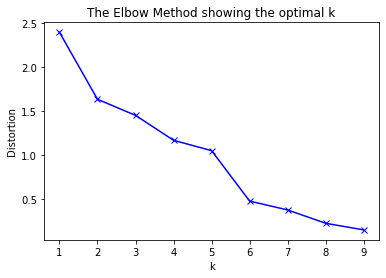

In [24]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k, random_state=0).fit(allvenues_grouped_cluster)
    #kmeanModel.fit(istanbul_grouped_clustering)
    distortions.append(sum(np.min(cdist(allvenues_grouped_cluster, kmeanModel.cluster_centers_, 'canberra'), axis=1)) / allvenues_grouped_cluster.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

**The top 10 venues for each borough**

In [25]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [26]:
num_top_venues = 5

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Borough']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
borough_venues_sorted = pd.DataFrame(columns=columns)
borough_venues_sorted['Borough'] = allvenues_grouped['Borough']

for ind in np.arange(allvenues_grouped.shape[0]):
    borough_venues_sorted.iloc[ind, 1:] = return_most_common_venues(allvenues_grouped.iloc[ind, :], num_top_venues)

borough_venues_sorted.head()

,Borough,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,BIRING KANAYA,Indonesian Restaurant,Outdoors and Recreation,Coto Restaurant,Travel and Transport,Soup Place
1,BONTOALA,Coto Restaurant,Travel and Transport,Soup Place,Outdoors and Recreation,Indonesian Restaurant
2,MAKASSAR,Coto Restaurant,Outdoors and Recreation,Travel and Transport,Indonesian Restaurant,Soup Place
3,MAMAJANG,Coto Restaurant,Outdoors and Recreation,Travel and Transport,Indonesian Restaurant,Soup Place
4,MANGGALA,Coto Restaurant,Indonesian Restaurant,Outdoors and Recreation,Travel and Transport,Soup Place


In [27]:
# add clustering labels
borough_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

makassar_mapping = geos_makassar

# merge manhattan_grouped with manhattan_data to add latitude/longitude for each neighborhood
makassar_mapping = makassar_mapping.join(borough_venues_sorted.set_index('Borough'), on='Borough')

makassar_mapping.head()

,Borough,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,MARISO,-5.159093,119.409226,6.0,Coto Restaurant,Travel and Transport,Outdoors and Recreation,Soup Place,Indonesian Restaurant
1,MAMAJANG,-5.164346,119.419383,2.0,Coto Restaurant,Outdoors and Recreation,Travel and Transport,Indonesian Restaurant,Soup Place
2,TAMALATE,-5.183735,119.423737,0.0,Coto Restaurant,Indonesian Restaurant,Outdoors and Recreation,Travel and Transport,Soup Place
3,RAPPOCINI,-5.173330,119.446951,0.0,Coto Restaurant,Indonesian Restaurant,Soup Place,Outdoors and Recreation,Travel and Transport
4,MAKASSAR,-5.147665,119.432731,2.0,Coto Restaurant,Outdoors and Recreation,Travel and Transport,Indonesian Restaurant,Soup Place


**Visualize the resulting clusters**

In [28]:
# create map
map_clusters = folium.Map(location=makassar_center, zoom_start=12)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(makassar_mapping['Latitude'], makassar_mapping['Longitude'], makassar_mapping['Borough'], makassar_mapping['Cluster Labels']):
    try:
        label = folium.Popup(str(poi) + ' Cluster ' + str(int(cluster)), parse_html=True)
        folium.CircleMarker(
            [lat, lon],
            radius=10,
            popup=label,
            color=rainbow[int(cluster)-3],
            fill=True,
            fill_color=rainbow[int(cluster)-3],
            fill_opacity=0.9).add_to(map_clusters)
    except:
        pass
       
map_clusters

## Examine Clusters

### Cluster 0.0

In [29]:
makassar_mapping.loc[makassar_mapping['Cluster Labels'] == 0, makassar_mapping.columns[[0] + list(range(3, makassar_mapping.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
2,TAMALATE,0.0,Coto Restaurant,Indonesian Restaurant,Outdoors and Recreation,Travel and Transport,Soup Place
3,RAPPOCINI,0.0,Coto Restaurant,Indonesian Restaurant,Soup Place,Outdoors and Recreation,Travel and Transport
9,TALLO,0.0,Coto Restaurant,Indonesian Restaurant,Outdoors and Recreation,Travel and Transport,Soup Place
11,MANGGALA,0.0,Coto Restaurant,Indonesian Restaurant,Outdoors and Recreation,Travel and Transport,Soup Place


### Cluster 1.0

In [30]:
makassar_mapping.loc[makassar_mapping['Cluster Labels'] == 1, makassar_mapping.columns[[0] + list(range(3, makassar_mapping.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
8,UJUNG TANAH,1.0,Outdoors and Recreation,Travel and Transport,Soup Place,Indonesian Restaurant,Event Place


### Cluster 2.0

In [31]:
makassar_mapping.loc[makassar_mapping['Cluster Labels'] == 2, makassar_mapping.columns[[0] + list(range(3, makassar_mapping.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
1,MAMAJANG,2.0,Coto Restaurant,Outdoors and Recreation,Travel and Transport,Indonesian Restaurant,Soup Place
4,MAKASSAR,2.0,Coto Restaurant,Outdoors and Recreation,Travel and Transport,Indonesian Restaurant,Soup Place
10,PANAKKUKANG,2.0,Coto Restaurant,Outdoors and Recreation,Soup Place,Indonesian Restaurant,Travel and Transport


### Cluster 3.0

In [32]:
makassar_mapping.loc[makassar_mapping['Cluster Labels'] == 3, makassar_mapping.columns[[0] + list(range(3, makassar_mapping.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
7,BONTOALA,3.0,Coto Restaurant,Travel and Transport,Soup Place,Outdoors and Recreation,Indonesian Restaurant


### Cluster 4.0

In [33]:
makassar_mapping.loc[makassar_mapping['Cluster Labels'] == 4, makassar_mapping.columns[[0] + list(range(3, makassar_mapping.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
13,TAMALANREA,4.0,Travel and Transport,Outdoors and Recreation,Coto Restaurant,Indonesian Restaurant,Soup Place


### Cluster 5.0

In [34]:
makassar_mapping.loc[makassar_mapping['Cluster Labels'] == 5, makassar_mapping.columns[[0] + list(range(3, makassar_mapping.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
12,BIRING KANAYA,5.0,Indonesian Restaurant,Outdoors and Recreation,Coto Restaurant,Travel and Transport,Soup Place


### Cluster 6.0

In [35]:
makassar_mapping.loc[makassar_mapping['Cluster Labels'] == 6, makassar_mapping.columns[[0] + list(range(3, makassar_mapping.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,MARISO,6.0,Coto Restaurant,Travel and Transport,Outdoors and Recreation,Soup Place,Indonesian Restaurant
6,WAJO,6.0,Coto Restaurant,Travel and Transport,Outdoors and Recreation,Soup Place,Indonesian Restaurant


# Results

Previously, we had determined that the Coto Makassar restaurant, soup place, and Indonesian restaurant were competitors' businesses, so we did not open a Coto restaurant close to them. Instead, we should open a coto restaurant near tourist areas and related places because it is an advantage for the coto restaurant business.

Of the 14 sub-districts, there are many tourist areas and related venues. Most of them are already busy with Indonesian restaurants, including Coto Makassar restaurant. However, it seems that there are still some quiet tourist areas with Coto Makassar restaurants and even Indonesian restaurants.

After we carried out the classification method using the k-mean method, the sub-districts were divided into 7 clusters.

# Discussion

Through map visualization and classification methods, we can see that there are 2 clusters that are still quiet with competitors' businesses. This cluster is the most optimal for opening a Coto Makassar restaurant, namely clusters 0 and 3.

Furthermore, there are 2 clusters that must be avoided to open a Coto restaurant, because in this cluster there are already many Coto Makassar restaurants and Indonesian restaurants. The clusters are clusters 1 and 5.

The remaining clusters, namely clusters 2, 4, and 6 can still be considered for opening a coto restaurant, because it can be seen that in this cluster there are many tourist areas and there are still competitor businesses, but not many.

# Conclusion

For business people and stakeholders who are interested in opening a coto restaurant in Makassar, we can recommend clusters 0 and 3. This cluster has little competition and has many tourist areas and related places, so this cluster is the optimal place to open a coto restaurant.